# Predicting Salary using YearsExperience

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import metrics

In [6]:
# loading the csv data into dataframe and previeing the first five rows
df_salary=pd.read_csv(r"C:\Users\BIS\Desktop\DATA SCIENCE ASSIGNMENTS\Simple Linear Regression\Salary_Data.csv")
df_salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# we need to extract the dependent and independent variables from the given dataset. The independent variable is years of experience, and the dependent variable is salary

In [7]:
x=df_salary.iloc[:,:-1].values
#we have taken -1 value since we want to remove the last column from the df_salary

In [8]:
x    #independent variable

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [9]:
y=df_salary.iloc[:, 1].values
#we have taken 1 value as a parameter, since we want to extract the second column and indexing starts from the zero.

In [10]:
y  #dependent variable

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [11]:
# Checking the no of rows and column
df_salary.shape

(30, 2)

In [12]:
# Checking for missing data
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [13]:
# checking the statistics of given data
df_salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# 2. Data Visualization (Exploratory Data Analysis)

# Checking for normal distribution and outlier detection using Histogram and boxplot
Since both salary and experience columns are continuous, we will use histogram and boxplot for checking normal distribution and outlier detection

C:\Users\BIS\AppData\Local\Temp\ipykernel_18096\2146815994.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_salary['YearsExperience'])
C:\Users\BIS\AppData\Local\Temp\ipykernel_18096\2146815994.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_salary['Salary'])


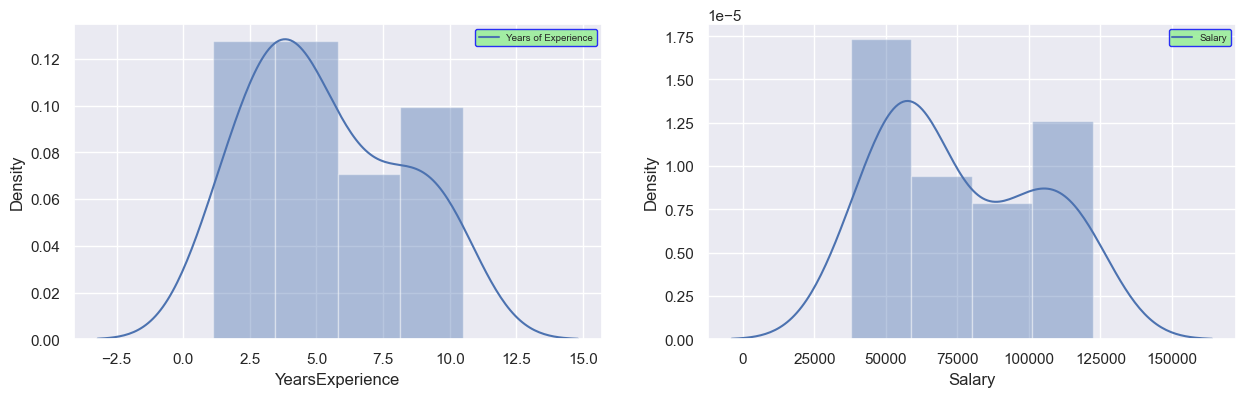

In [14]:
# Visualizing the distribution 
sns.set(rc={"figure.figsize": (15,9)});
#creating first plot
plt.subplot(2,2,1)
ax = sns.distplot(df_salary['YearsExperience'])
plt.legend(["Years of Experience"],prop = { "size": 7 },loc='upper right',facecolor='lightgreen',edgecolor='blue')

# Creating the second plot-distanc
plt.subplot(2,2,2)
ax = sns.distplot(df_salary['Salary'])
plt.legend(["Salary"],prop = { "size": 7 },loc='upper right',facecolor='lightgreen',edgecolor='blue')
plt.show()

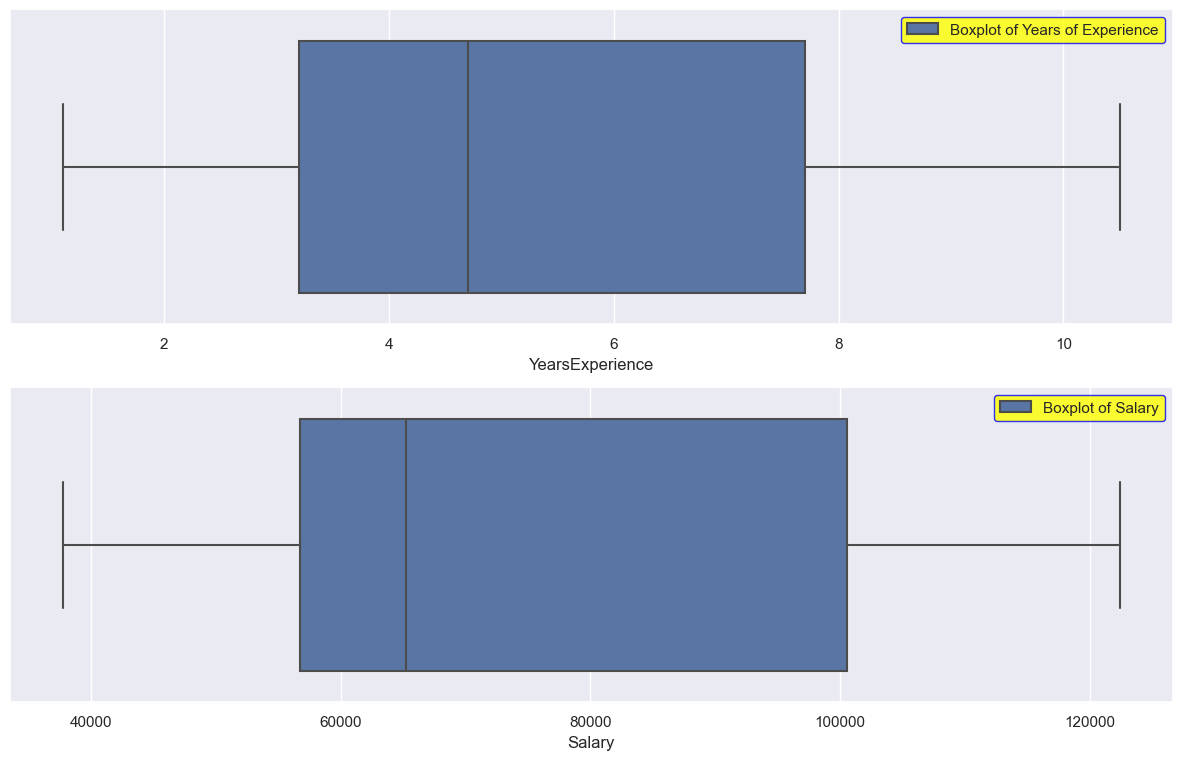

In [15]:
# BOXPLOTS
sns.set(rc={"figure.figsize": (15,9)})
#creating first plot
plt.subplot(2,1,1)
ax = sns.boxplot(x=df_salary['YearsExperience'])
plt.legend(['Boxplot of Years of Experience'],loc='upper right',facecolor='yellow',edgecolor='blue')

# Creating the second 
plt.subplot(2,1,2)
ax = sns.boxplot(x=df_salary['Salary'])
plt.legend(["Boxplot of Salary"],loc='upper right',facecolor='yellow',edgecolor='blue')
plt.show()

In [16]:
## No outliers present in Years Experience and Salary data

# Checking for correlation between input and output variable using scatter plot and correlation matrix

<Axes: xlabel='YearsExperience', ylabel='Salary'>

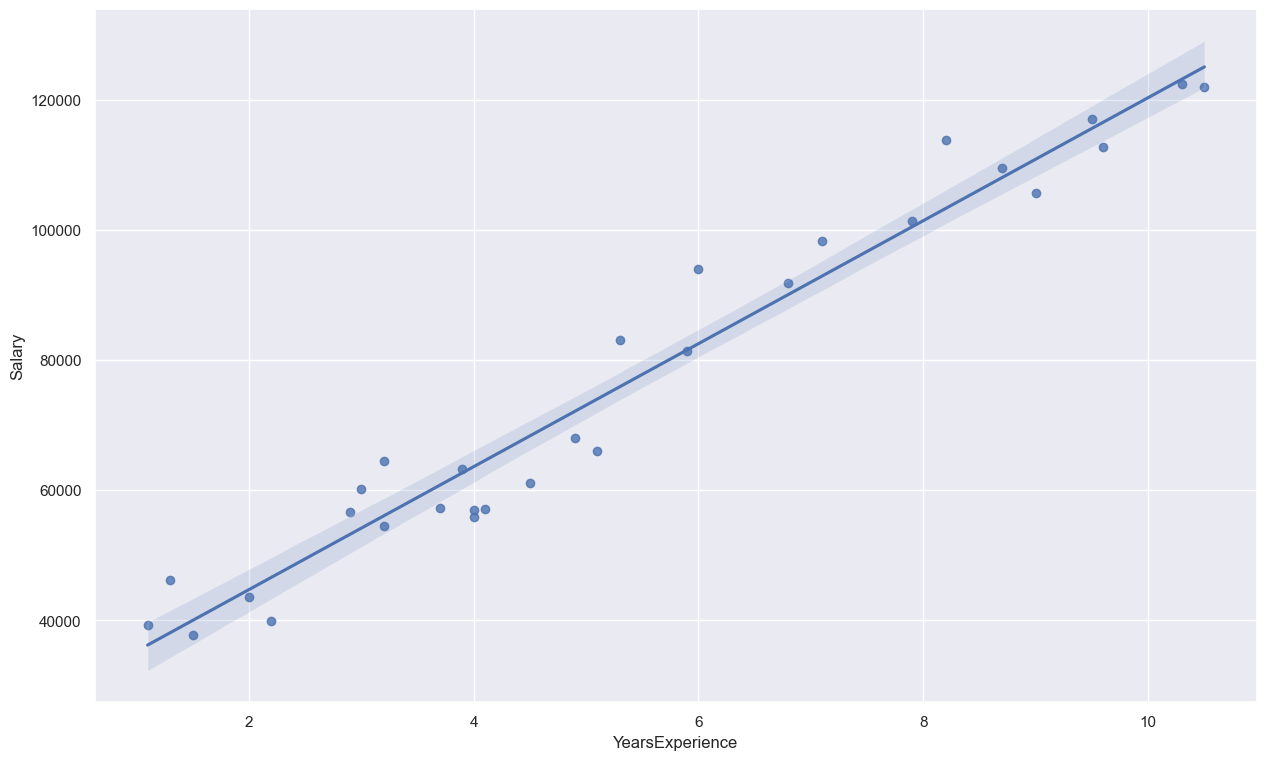

In [17]:
sns.regplot(x="YearsExperience", y="Salary", data=df_salary)

# Correlation Matrix

In [18]:
df_salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


There is high positive correlation(0.978) between Salary and Years of Experience

# Fitting the Model

In [35]:
model= smf.ols("Salary~YearsExperience",data = df_salary).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           1.14e-20
Time:                        22:55:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [37]:
# Getting tvalue and pvalue
tvalue, pvalue = (model.tvalues, model.pvalues)

In [23]:
tvalue, pvalue

(Intercept          11.346940
 YearsExperience    24.950094
 dtype: float64,
 Intercept          5.511950e-12
 YearsExperience    1.143068e-20
 dtype: float64)

In [38]:
# Getting R squared values
r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)

In [39]:
r_sq, r_sq_adj

(0.9569566641435086, 0.9554194021486339)

#Checking predictions of Model by equation
Y = 25792.200199 + 9449.962321*X

# Logarithmic Transformation
Y = a + b * log(x)

In [44]:
# Preparing data for model building
model_1 = pd.DataFrame.copy(df_salary)
model_1['log_YearsExperience'] = np.log(model_1.YearsExperience)
model_1.head()

,YearsExperience,Salary,log_YearsExperience
0,1.1,39343.0,0.095310
1,1.3,46205.0,0.262364
2,1.5,37731.0,0.405465
3,2.0,43525.0,0.693147
4,2.2,39891.0,0.788457


In [46]:
# Building model
log_model = smf.ols('Salary ~ log_YearsExperience', data = model_1).fit()

In [47]:
# Coefficients
log_model.params

Intercept              14927.97177
log_YearsExperience    40581.98796
dtype: float64

In [48]:
# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)

In [49]:
tvalue, pvalue

(Intercept               2.895135
 log_YearsExperience    12.791989
 dtype: float64,
 Intercept              7.268813e-03
 log_YearsExperience    3.250155e-13
 dtype: float64)

In [50]:
# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)

In [51]:
r_sq, r_sq_adj

(0.8538888828756969, 0.8486706286926861)

#Checking predictions of Model by equation
Y = 14927.97177 + 40581.98796*log(X)

# Exponential transformation
log(Y) =α + βX + ε

In [53]:
# preparing data to build exponential model
model_1['log_Salary'] = np.log(model_1.Salary)
model_1.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906


In [54]:
# Building model
exp_model = smf.ols('log_Salary ~ YearsExperience', data = model_1).fit()

In [55]:
# Coefficients
exp_model.params

Intercept          10.507402
YearsExperience     0.125453
dtype: float64

In [ ]:
# Getting tvalue and pvalue
tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)

In [56]:
tvalue, pvalue

(Intercept               2.895135
 log_YearsExperience    12.791989
 dtype: float64,
 Intercept              7.268813e-03
 log_YearsExperience    3.250155e-13
 dtype: float64)

In [57]:
# Getting R squared values
r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)

In [58]:
r_sq, r_sq_adj

(0.9319671194084195, 0.9295373736730059)

Checking predictions of Model by equation
log(Y) = 10.507402 + 0.125453*X + e

In [60]:
predicted_salary = exp_model.predict(model_1.YearsExperience)
pred_df = pd.DataFrame({'Salary_Actual' : model_1.log_Salary, 'Salary_Predicted' : predicted_salary})
pred_df

,Salary_Actual,Salary_Predicted
0,10.580073,10.645400
1,10.740843,10.670491
2,10.538237,10.695581
3,10.681091,10.758308
4,10.593906,10.783398
5,10.944506,10.871215
6,11.004597,10.883761
7,10.904946,10.908851
8,11.073567,10.908851
9,10.954117,10.971578


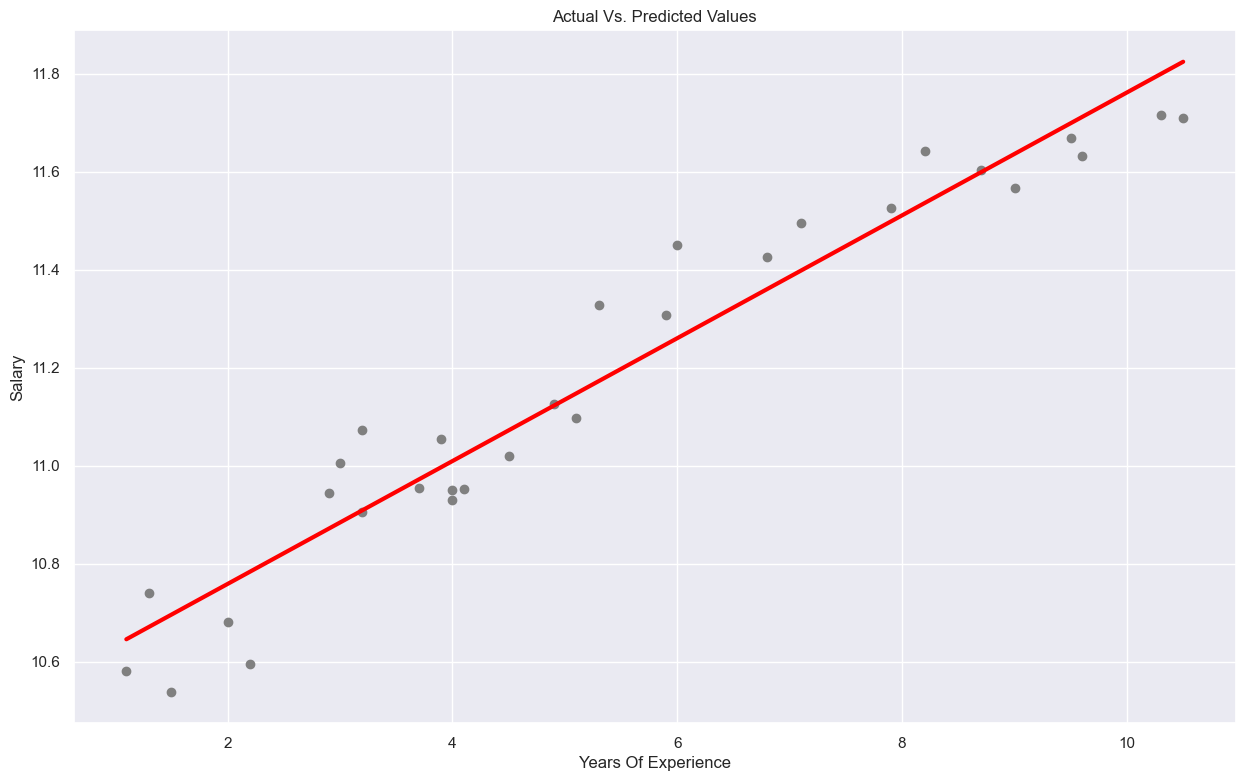

In [62]:
# Plotting Actual Vs. Predicted Values
plt.scatter(model_1.YearsExperience,model_1.log_Salary,  color='gray')
plt.plot(model_1.YearsExperience, predicted_salary, color='red', linewidth=3)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

In [64]:
from sklearn import metrics

In [67]:
#Calculating Errors
print('Mean Absolute Error:',     metrics.mean_absolute_error(model_1.log_Salary, predicted_salary))  
print('Mean Squared Error:',      metrics.mean_squared_error(model_1.log_Salary, predicted_salary))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(model_1.log_Salary, predicted_salary)))
print("R^2 Score :          ",    metrics.r2_score(model_1.log_Salary, predicted_salary))

Mean Absolute Error: 0.07981492426092208
Mean Squared Error: 0.00894431117203029
Root Mean Squared Error: 0.0945743684728071
R^2 Score :           0.9319671194084195
